In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import wilcoxon
fscore=[[0.32, 0.16, 0.36, 0.25, 0.15, 0.30, 0.35, 0.49],
[0.27, 0.18, 0.29, 0.24, 0.11, 0.20, 0.20, 0.42],
[0.19, 0.57, 0.21, 0.15, 0.30, 0.14, 0.18, 0.41],
[0.30, 0.23, 0.20, 0.16, 0.09, 0.15, 0.07, 0.16],
[0.13, 0.07, 0.22, 0.12, 0.08, 0.13, 0.08, 0.17],
[0.28, 0.10, 0.12, 0.15, 0.08, 0.12, 0.08, 0.08],
[0.26, 0.15, 0.08, 0.08, 0.03, 0.09, 0.05, 0.10],
[0.25, 0.16, 0.06, 0.11, 0.03, 0.07, 0.03, 0.06],
[0.12, 0.06, 0.16, 0.21, 0.04, 0.10, 0.12, 0.03],
[0.17, 0.07, 0.15, 0.04, 0.05, 0.10, 0.06, 0.10],
[0.09, 0.04, 0.06, 0.03, 0.03, 0.05, 0.04, 0.11],
[0.12, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 0.00]
]

tool_order=['CLW(T3Pattern)', 'CLW(T3Token)', 'Deckard', 'CCFinder', 
            'CLW(T2Blind)', 'ConQAT', 'iClones', 'Simian', 
            'Nicad', 'SimCAD', 'CLW(T1)', 'Duplo']

In [26]:
print(fscore[0], "\n", fscore[1])
print(len(fscore))

[0.32, 0.16, 0.36, 0.25, 0.15, 0.3, 0.35, 0.49] 
 [0.27, 0.18, 0.29, 0.24, 0.11, 0.2, 0.2, 0.42]
12


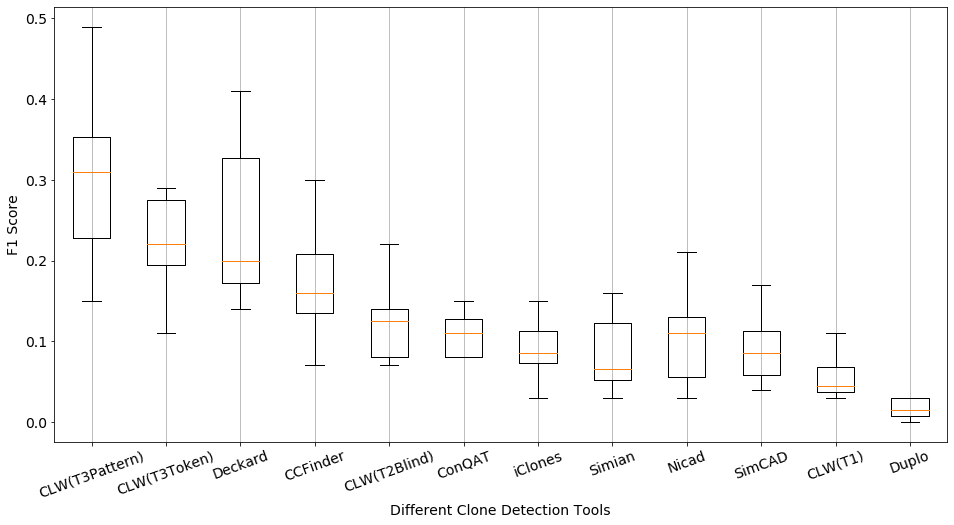

In [28]:
plt.rc('font', size=14)          # controls default text sizes
fig= plt.figure(figsize=(16,8))
plt.xticks(rotation=20)
plt.boxplot(fscore, 0, '')
plt.xticks([1,2,3,4,5,6,7,8, 9, 10, 11, 12], tool_order)
plt.grid(axis='x')
plt.xlabel("Different Clone Detection Tools")
plt.ylabel("F1 Score")
plt.show()
fig.savefig('generated_img/cochange_boxFScores_ranked.png', dpi=300)

In [33]:
print(fscore[0])
print(fscore[1])
print(wilcoxon(fscore[0], fscore[1]))

[0.32, 0.16, 0.36, 0.25, 0.15, 0.3, 0.35, 0.49]
[0.27, 0.18, 0.29, 0.24, 0.11, 0.2, 0.2, 0.42]
WilcoxonResult(statistic=2.0, pvalue=0.02488399513396536)


In [34]:
#This is for wilcoxon rank test for individually testing Precision or Recall or FScore are significantly different
# or not? In this case we have 1 observation from each subject systems, and for each of the Precision, Recall, and 
# FScore we will do wilcoxon test individually. 
heading=tool_order

result_stat=[["Feature Sets 1", "Feature Sets 2", "w", "p", "Result (p<0.5)"]]
for i in range(len(heading)):
    for j in range(i+1, len(heading)):
        w, p = wilcoxon(fscore[i], fscore[j])
        if(p<0.05):
            result_stat.append([heading[i], heading[j], w, p, 's'])
        else: result_stat.append([heading[i], heading[j], w, p, '-1'])
    
pd.DataFrame(result_stat).to_csv('./generated_files/cochage_fscore_ranked_wilcoxon.csv', index=False)   

In [34]:
#Check whether diff also providing the same result or not!!!
target_datasets=[precisions, recalls, fscores]
dataset_names=["Precision", "Recall", "FScore"]
heading=['GS-ALL', 'GS', 'TS', 'TP', 'GS+TS', 'GS+TP', 'TS+TP', 'GS+TS+TP']
result_stat=[["Dataset", "Feature Sets 1", "Feature Sets 1", "w", "p", "Result (p<0.5)"]]
target_flg=0
for td in target_datasets:
    for i in range(len(heading)):
        for j in range(i+1, len(heading)):
            diff=[]
            for k in range(len(td[i])):
                diff.append(td[i][k]-td[j][k])
            print(diff)
            w, p = wilcoxon(diff)
            if(p<0.05):
                result_stat.append([dataset_names[target_flg], heading[i], heading[j], w, p, 's'])
            else: result_stat.append([dataset_names[target_flg], heading[i], heading[j], w, p, '-1'])
                
    target_flg+=1
    
pd.DataFrame(result_stat).to_csv('./generated_files/resuslt_wilcoxon_prf_separately_diff.csv', index=False)   

[-0.12, -0.21999999999999997, -0.13, -0.030000000000000027, -0.09999999999999998, -0.06000000000000005]
[-0.12, -0.07999999999999996, -0.44999999999999996, -0.15000000000000002, -0.18999999999999995, -0.36]
[-0.010000000000000009, -0.22999999999999998, -0.24, -0.15000000000000002, -0.040000000000000036, -0.36]
[-0.20000000000000007, -0.07999999999999996, -0.16000000000000003, -0.10999999999999999, -0.30999999999999994, -0.20999999999999996]
[-0.14, -0.1499999999999999, -0.21999999999999997, -0.20999999999999996, -0.16000000000000003, -0.22999999999999998]
[-0.16000000000000003, -0.07999999999999996, -0.27, -0.18000000000000005, -0.18999999999999995, -0.17000000000000004]
[-0.20000000000000007, -0.13, -0.13, -0.18999999999999995, -0.20999999999999996, -0.36]
[0.0, 0.14, -0.31999999999999995, -0.12, -0.08999999999999997, -0.29999999999999993]
[0.10999999999999999, -0.010000000000000009, -0.10999999999999999, -0.12, 0.05999999999999994, -0.29999999999999993]
[-0.08000000000000007, 0.14, -